In [8]:
# 0
# have to re upload every new time you work on project
import pandas as pd

df = pd.read_csv("../Data/avocado-updated-2020.csv")
df


,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


1. The data set contains data about avacado shipments. Most of the data is something to do with the size of the shipment. But information about pirce, location, category, and year is also contained.

2.

In [41]:
# rename coloums with number names to what the number acutaly means
df1 = df.rename(columns={'4046':'small_avocados','4225':'large_avocados','4770':'extra_large_avocados'})
df1.head()

,date,average_price,total_volume,small_avocados,large_avocados,extra_large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [42]:
# make a new variable geo_type that maps the values of "city","state"region","US"
def categorize_geography(geography):
    if geography == 'Total U.S.':
        return 'US'
    elif len(geography.split()) > 1 and 'Region' in geography:
         return 'Region'
    elif len(geography.split()) == 1:
        return 'State/City'
    else:
        return 'Other'

df1['geo_type'] = df1['geography'].apply(categorize_geography)
display(df1.head())

,date,average_price,total_volume,small_avocados,large_avocados,extra_large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,State/City
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,State/City
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,State/City
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,State/City
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,State/City


3.

In [43]:
# Filter the data for the year 2017, organic type, and small Hass avocados, excluding 'Total U.S.'
organic_small_2017 = df1[(df1['year'] == 2017) & (df1['type'] == 'organic') & (df1['geography'] != 'Total U.S.')]

# Group by geography and sum the '4046' column (small Hass avocados)
region_sales = organic_small_2017.groupby('geography')['small_avocados'].sum()

# Find the region with the maximum sales
most_sales_region = region_sales.idxmax()
most_sales_volume = region_sales.max()

print(most_sales_region)
print(most_sales_volume)

West
1870206.29


4.

In [44]:
# 4 Split the date variable into month, day, and year variables.
df1['date'] = pd.to_datetime(df1['date'])
df1['month'] = df1['date'].dt.month
df1['day'] = df1['date'].dt.day
df1['year'] = df1['date'].dt.year
df1.head()

,date,average_price,total_volume,small_avocados,large_avocados,extra_large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,State/City,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,State/City,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,State/City,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,State/City,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,State/City,1,4


In [45]:
# In which month is the highest average volume of avocado sales?
average_volume_by_month = df1.groupby('month')['total_volume'].mean()

# idxmax finds label of max()
month_with_highest_volume = average_volume_by_month.idxmax()
highest_average_volume = average_volume_by_month.max()

print(month_with_highest_volume)
print(highest_average_volume)

5
1123632.254218107


5.

In [46]:
# Which metro area geographical regions sold the most total avocados?
metro_areas_df = df1[df1['geo_type'] == 'State/City']
metro_sales = metro_areas_df.groupby('geography')['total_volume'].sum()
most_sales_metro = metro_sales.idxmax()
most_sales_volume_metro = metro_sales.max()

# office hour question
print(most_sales_metro)
print(most_sales_volume_metro)

West
2150048736.22


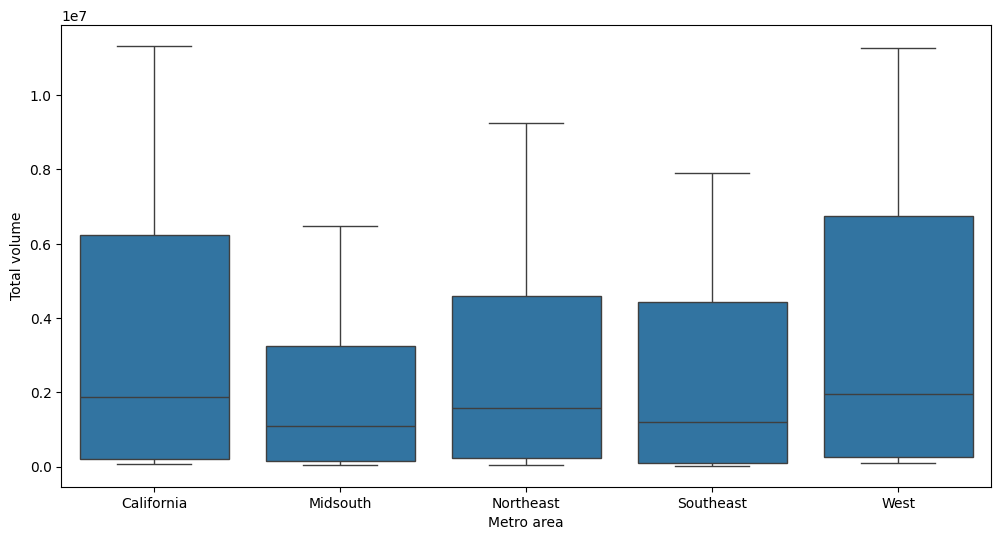

In [47]:
# Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.
import matplotlib.pyplot as plt
import seaborn as sns

# avrges and get top five
metro_average_volume = metro_areas_df.groupby('geography')['total_volume'].mean()
top_5_metro_areas = metro_average_volume.nlargest(5).index
top_5_metro_df = metro_areas_df[metro_areas_df['geography'].isin(top_5_metro_areas)]

# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='geography', y='total_volume', data = top_5_metro_df)
plt.xlabel('Metro area')
plt.ylabel('Total volume')
plt.show()

6.

In [48]:
# From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.
Ca = df1[df1['geography'] == 'California']
Ca

,date,average_price,total_volume,small_avocados,large_avocados,extra_large_avocados,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,geo_type,month,day
12,2015-01-04,0.93,5777334.90,2843648.26,2267755.26,137479.64,528451.74,477193.38,47882.56,3375.80,conventional,2015,California,State/City,1,4
13,2015-01-04,1.24,142349.77,107490.73,25711.96,2.93,9144.15,9144.15,0.00,0.00,organic,2015,California,State/City,1,4
120,2015-01-11,0.92,6024932.34,2889591.29,2485720.10,103573.42,546047.53,510560.41,31874.03,3613.09,conventional,2015,California,State/City,1,11
121,2015-01-11,1.10,158110.68,123712.51,25975.27,1.47,8421.43,8421.43,0.00,0.00,organic,2015,California,State/City,1,11
228,2015-01-18,1.02,5570915.26,2780859.66,2108450.36,121614.31,559990.93,520299.26,36501.18,3190.49,conventional,2015,California,State/City,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32734,2020-11-15,1.71,322704.90,19687.09,19255.69,10.59,283751.53,192147.59,91603.94,0.00,organic,2020,California,State/City,11,15
32841,2020-11-22,1.05,6267289.98,2019504.16,662226.62,94857.91,3490701.29,1957021.40,1280020.20,253659.69,conventional,2020,California,State/City,11,22
32842,2020-11-22,1.68,331997.12,17745.57,16560.08,14.45,297677.02,201251.84,96425.18,0.00,organic,2020,California,State/City,11,22
32949,2020-11-29,1.18,5009425.38,1465573.37,559862.61,104376.73,2879612.67,1681508.04,1044460.20,153644.43,conventional,2020,California,State/City,11,29


7.

In [52]:
# In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.
# office hour question, is this first line simlar to k means clustering?
Ca_price = Ca.groupby(['geography', 'type'])['average_price'].mean().reset_index()
pivot_Ca_price = Ca_price.pivot(index='geography', columns='type', values='average_price')
pivot_Ca_price['price_difference'] = pivot_Ca_price['organic'] - pivot_Ca_price['conventional']
display(pivot_Ca_price[['price_difference']])

# summary stats
display(pivot_Ca_price['price_difference'].describe())

type,price_difference
geography,
California,0.587059


,price_difference
count,1.000000
mean,0.587059
std,NaN
min,0.587059
25%,0.587059
50%,0.587059
75%,0.587059
max,0.587059


8.

In [56]:
# recreate plot

import pandas as pd
from plotnine import *

cities = ['Los Angeles', 'Sacramento', 'San Diego', 'San Francisco']
ca = df1[df1['geography'].isin(cities)].copy()
avg = (ca.groupby(['geography','type'], as_index=False)[['small_avocados','large_avocados','extra_large_avocados']].mean())
# need as_index = false to keep geogrgy and type as colom and not make a seperate index?


In [57]:
long = avg.melt(id_vars=['geography','type'],
                value_vars=['small_avocados','large_avocados','extra_large_avocados'],
                var_name='size', value_name='avg_volume')


size_map = {'small_avocados':'Small', 'large_avocados':'Large', 'extra_large_avocados':'Xlarge'}
long['size'] = long['size'].map(size_map)
long['geography'] = pd.Categorical(long['geography'], categories=cities, ordered=True)

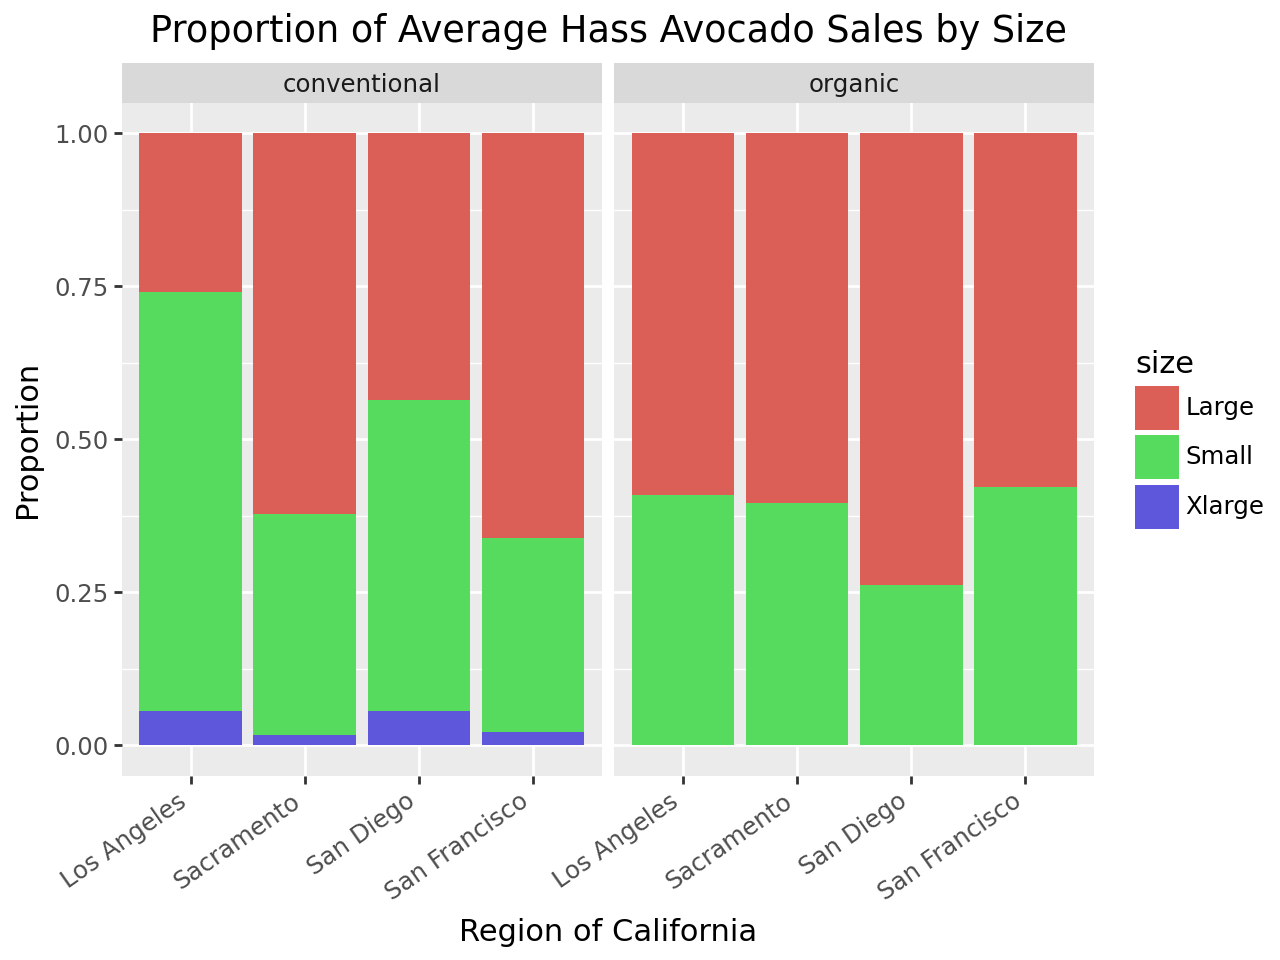

In [58]:
p = (
    ggplot(long, aes(x='geography', y='avg_volume', fill='size'))
    + geom_col(position='fill')
    + facet_wrap('~type')
    + labs(title='Proportion of Average Hass Avocado Sales by Size',
           x='Region of California', y='Proportion')
    + theme(axis_text_x=element_text(angle=35, hjust=1))
)
p

Using Outside Data

In [60]:
# new data
import pandas as pd

house = pd.read_csv("/content/data_data.csv")
house


,Region,Month of Period End,Measure Names,Measure Values
0,"Los Angeles, CA metro area",August 2025,Average Sale To List YoY,-0.010693
1,"Los Angeles, CA metro area",July 2025,Average Sale To List YoY,-0.014738
2,"Los Angeles, CA metro area",June 2025,Average Sale To List YoY,-0.015084
3,"Los Angeles, CA metro area",May 2025,Average Sale To List YoY,-0.011164
4,"Los Angeles, CA metro area",April 2025,Average Sale To List YoY,-0.009757
...,...,...,...,...
11803,"San Francisco, CA",May 2012,Median Sale Price,735000.000000
11804,"San Francisco, CA",April 2012,Median Sale Price,750000.000000
11805,"San Francisco, CA",March 2012,Median Sale Price,690000.000000
11806,"San Francisco, CA",February 2012,Median Sale Price,660000.000000


In [73]:
# join data
import pandas as pd

# normalizing the two data sets
house = house.rename(columns={'Month of Period End:':'date', 'Measure Values':'home_price'})
df1['ym']   = pd.to_datetime(df1['date']).dt.to_period('M')
house['ym'] = pd.to_datetime(house['date']).dt.to_period('M')
df1['geo_key']   = df1['geography'].str.replace(r',?\s*CA.*$', '', regex=True).str.strip().str.lower()
house['geo_key'] = house['Region']   .str.replace(r',?\s*CA.*$', '', regex=True).str.strip().str.lower()

joined = df1.merge(house[['geo_key','ym','home_price']], on=['geo_key','ym'], how='inner')

# geo_key no longer needed
joined = joined.drop(columns=['geo_key'])
joined.head()
joined.describe()


,date,average_price,total_volume,small_avocados,large_avocados,extra_large_avocados,total_bags,small_bags,large_bags,xlarge_bags,year,month,day,home_price
count,44064,44064.000000,4.406400e+04,4.406400e+04,4.406400e+04,44064.000000,4.406400e+04,4.406400e+04,4.406400e+04,44064.000000,44064.000000,44064.000000,44064.000000,4.406400e+04
mean,2017-12-12 06:02:21.176470784,1.527925,6.358673e+05,2.152494e+05,1.650052e+05,17039.045106,2.385737e+05,1.848599e+05,4.122792e+04,12485.859963,2017.460784,6.372549,15.529412,3.928211e+04
min,2015-01-04 00:00:00,0.530000,3.562520e+03,2.642100e+02,3.157700e+02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000,-4.000000e+01
25%,2016-06-19 00:00:00,1.150000,2.187525e+04,4.044680e+03,7.991698e+03,0.000000,7.024727e+03,6.609792e+03,5.597500e+00,0.000000,2016.000000,3.000000,8.000000,-6.250000e-03
50%,2017-12-06 12:00:00,1.500000,2.342966e+05,5.370725e+04,3.460315e+04,259.625000,5.533531e+04,5.385009e+04,7.649050e+02,0.000000,2017.000000,6.000000,15.000000,7.445008e-02
75%,2019-06-16 00:00:00,1.840000,6.705209e+05,1.830383e+05,2.652394e+05,16190.412500,1.767946e+05,1.335343e+05,1.786880e+04,3011.407500,2019.000000,9.000000,23.000000,2.500000e+01
max,2020-11-29 00:00:00,3.250000,5.660216e+06,2.914047e+06,1.447534e+06,346605.000000,3.336124e+06,2.808810e+06,1.155547e+06,495393.990000,2020.000000,12.000000,31.000000,1.549500e+06
std,NaN,0.460954,9.804787e+05,3.994165e+05,2.131840e+05,34799.041494,4.782757e+05,3.707053e+05,1.176552e+05,44854.495406,1.699721,3.384707,8.833015,1.827704e+05


In [74]:
# Use your new joined data set to make an argument about the relationship between house prices and avocado prices/sales. Support your argument with a plot.
import pandas as pd
from plotnine import *

# need to see the corelation between avacode price and home price to make a educated arguement
corr_price = joined.groupby(['geography','type'])[['home_price', 'average_price']].corr().unstack().iloc[:,[1]]
corr_price.columns = ['corr_home_vs_avoprice']
corr_vol = joined.groupby(['geography','type'])[['home_price', 'total_volume']].corr().unstack().iloc[:,[1]]
corr_vol.columns = ['corr_home_vs_volume']

display(corr_price)
display(corr_vol)

corr_home_vs_avoprice
geography     type                               
Los Angeles   conventional               0.012669
              organic                    0.013958
Sacramento    conventional               0.007055
              organic                   -0.005611
San Diego     conventional               0.009314
              organic                    0.009789
San Francisco conventional               0.003253
              organic                   -0.002296

corr_home_vs_volume
geography     type                             
Los Angeles   conventional             0.004888
              organic                  0.018947
Sacramento    conventional             0.014761
              organic                  0.020374
San Diego     conventional             0.007405
              organic                  0.019401
San Francisco conventional             0.008084
              organic                  0.012492

We can see in the data output that correlation vlaues are low across the board. So I dont think there is any significant correlation between housing being unafordable and the price of avocados orangaic or not grown in the region. In the graph bellow we dont see the linear realtiosnhip that indicated a correlation between avocado prices and housing prices.

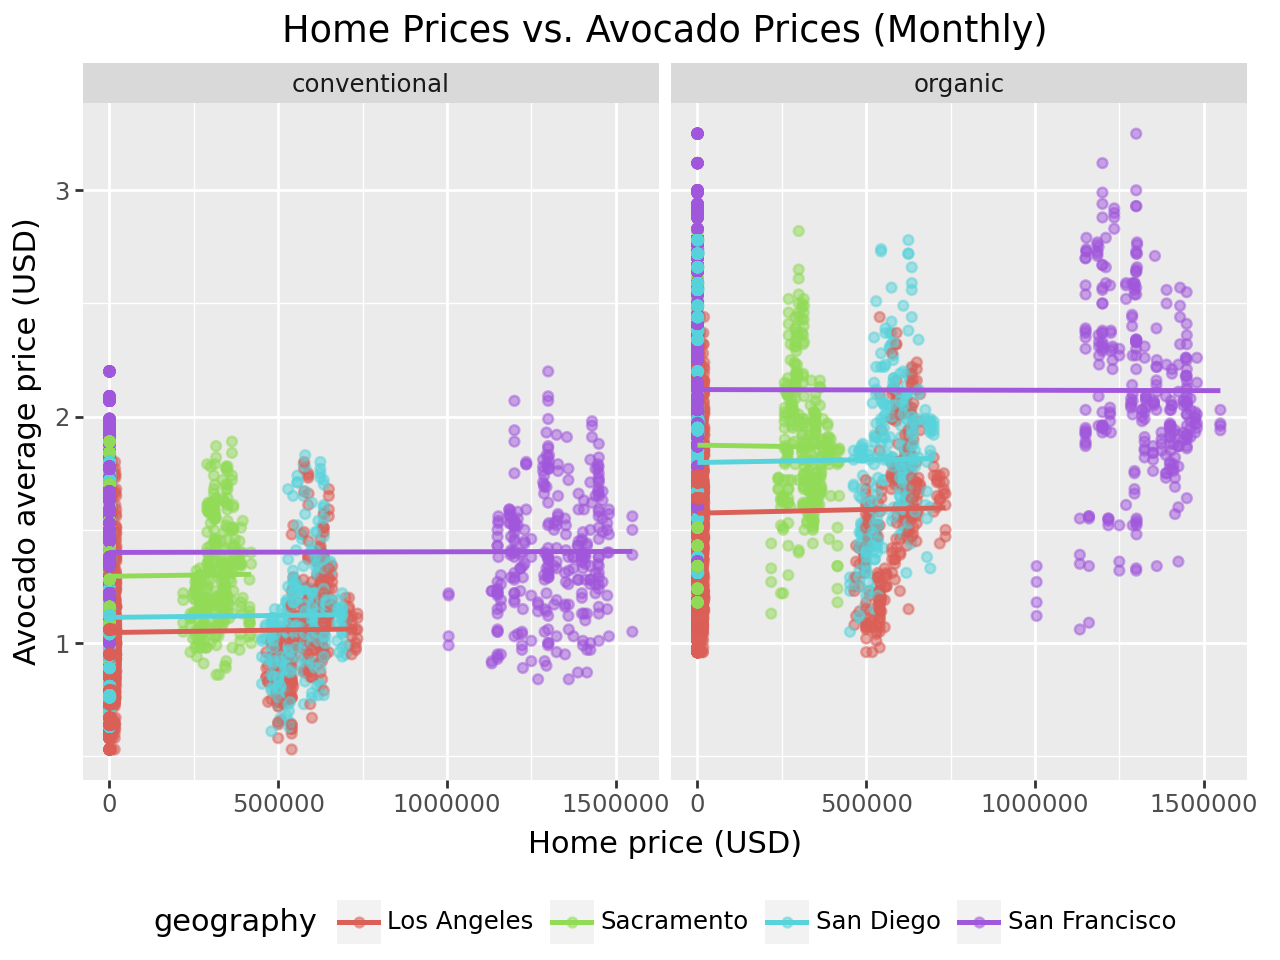

In [72]:
# plot
p1 = (
    ggplot(joined, aes('home_price', 'average_price', color='geography'))
    + geom_point(alpha=0.5)
    + geom_smooth(method='lm', se=False)
    + facet_wrap('~type')
    + labs(title='Home Prices vs. Avocado Prices (Monthly)',
           x='Home price (USD)',
           y='Avocado average price (USD)')
    + theme(legend_position='bottom')
)
p1